**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

**Reading data**

In [ ]:
data = pd.read_csv('/content/breast-cancer.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


**Data preprocessing**

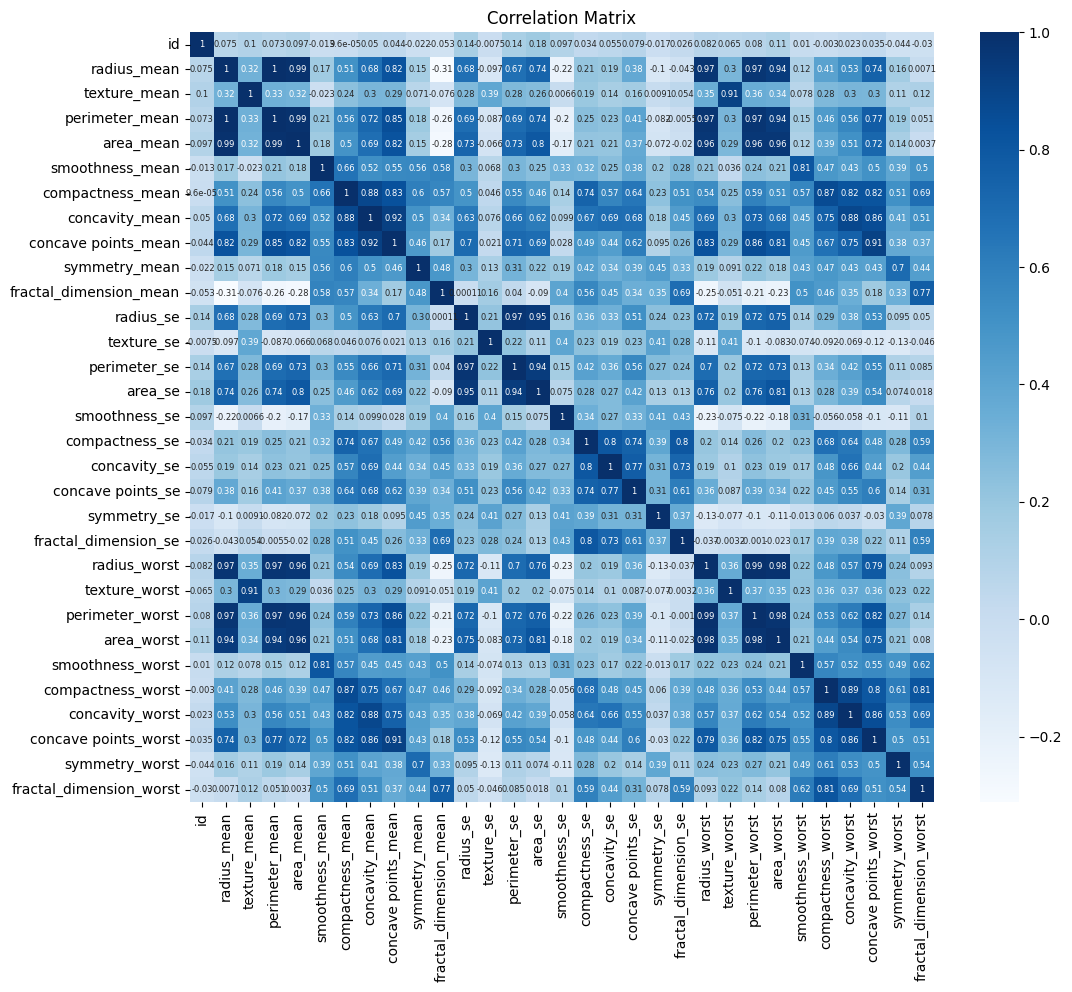

In [ ]:
matrix = data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, cmap="Blues", annot=True, annot_kws={"size": 6})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
def drop_highly_correlated_features(df, threshold=0.8):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop features
    df_reduced = df.drop(columns=to_drop)

    return df_reduced

In [ ]:
data_2 = drop_highly_correlated_features(data.select_dtypes(include=np.number), threshold=0.8)

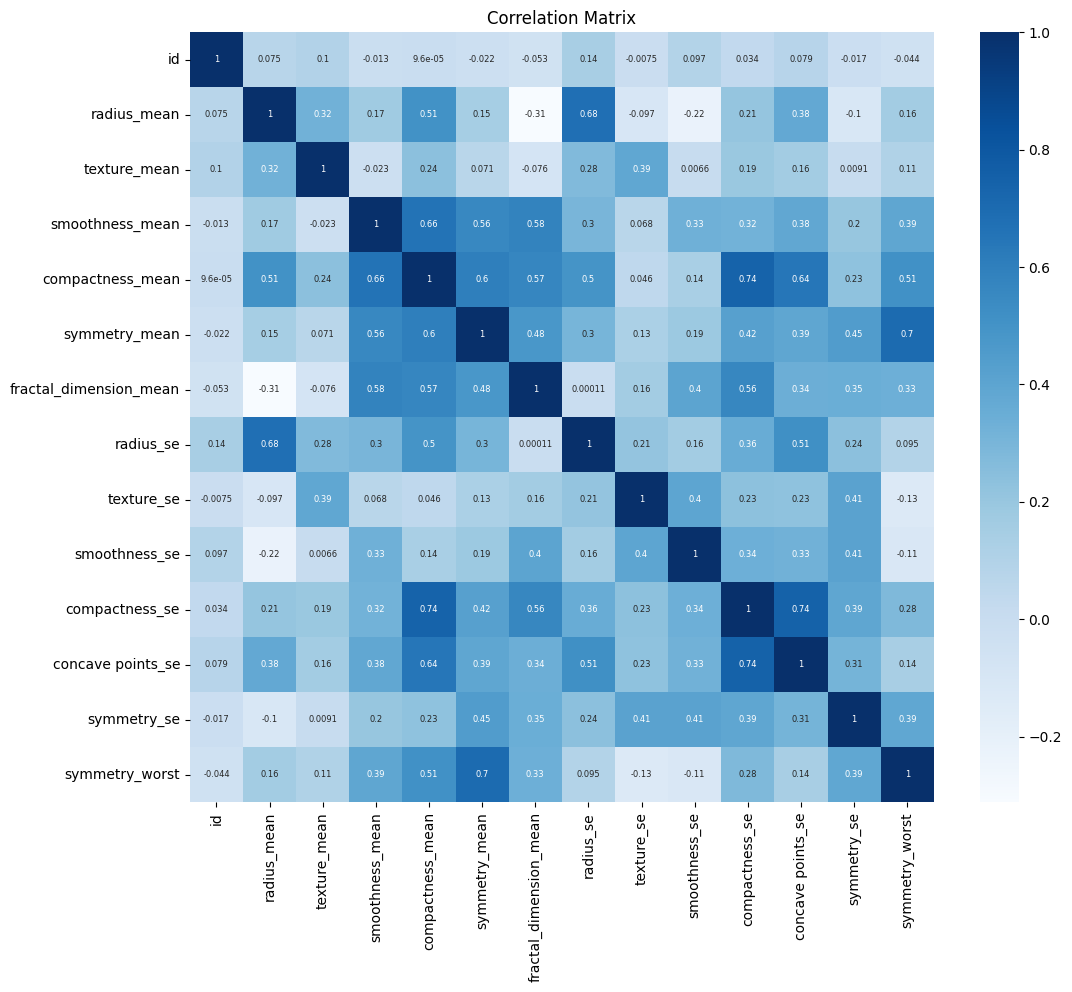

In [ ]:
matrix_2 = data_2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matrix_2, cmap="Blues", annot=True, annot_kws={"size": 6})
plt.title('Correlation Matrix')
plt.show()

**drop ID**

In [ ]:
data_2 = data_2.drop(data_2.columns[0],axis=1)

In [ ]:
data_2.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


{'whiskers': [<matplotlib.lines.Line2D at 0x7997aa51a6e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7997aa51b0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7997aa51a590>,
 'medians': [<matplotlib.lines.Line2D at 0x7997aa518760>,
 'fliers': [<matplotlib.lines.Line2D at 0x7997aa518d90>,
 'means': []}

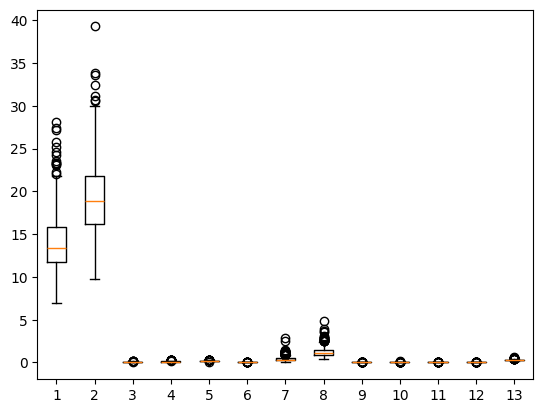

In [ ]:
plt.boxplot(data_2)

In [ ]:
origianl_coulmns = data_2.columns

In [ ]:
origianl_coulmns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'symmetry_worst'],
      dtype='object')

**Data scaling using StandardScaler**

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_2)

In [ ]:
scaled_data = pd.DataFrame(scaled_data,columns=origianl_coulmns)

{'whiskers': [<matplotlib.lines.Line2D at 0x7997aa2eefe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7997aa2ed870>,
 'boxes': [<matplotlib.lines.Line2D at 0x7997aa2efd90>,
 'medians': [<matplotlib.lines.Line2D at 0x7997aa2ec370>,
 'fliers': [<matplotlib.lines.Line2D at 0x7997aa2ee140>,
 'means': []}

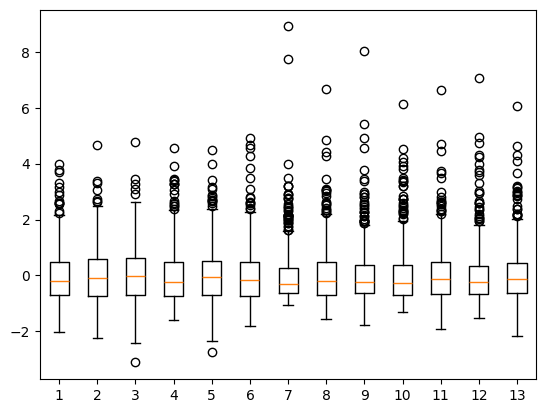

In [ ]:
plt.boxplot(scaled_data)

In [ ]:
scaled_data['diagnosis'] = data['diagnosis']

In [ ]:
scaled_data.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst,diagnosis
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.660820,1.148757,2.750622,M
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,0.260162,-0.805450,-0.243890,M
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,1.424827,0.237036,1.152255,M
3,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,1.115007,4.732680,6.046041,M
4,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,1.144205,-0.361092,-0.868353,M


**Dropping outlier**

In [ ]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Use boolean indexing to filter outliers
    df_no_outliers = df[(df[column_name] >= lower) & (df[column_name] <= upper)]

    return df_no_outliers

In [ ]:
columns_to_process = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'symmetry_worst']

data_no_outliers = scaled_data.copy()  # Create a copy to avoid modifying the original DataFrame

for column in columns_to_process:
    data_no_outliers = remove_outliers(data_no_outliers, column)



In [ ]:
data_no_outliers.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst,diagnosis
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,0.260162,-0.805450,-0.243890,M
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,1.424827,0.237036,1.152255,M
5,-0.476375,-0.835335,2.237421,1.244335,1.005402,1.890005,-0.255070,-0.592662,0.156347,0.445544,-0.069124,0.134119,1.754069,M
6,1.170908,0.160649,-0.123136,0.088295,-0.064325,-0.762332,0.149883,-0.804940,-0.909030,-0.651568,-0.228089,-0.829666,0.262476,M
7,-0.118517,0.358450,1.604049,1.140102,1.403355,1.660353,0.643623,0.290561,0.588031,0.268933,0.435349,-0.688004,0.477640,M


**visualization**

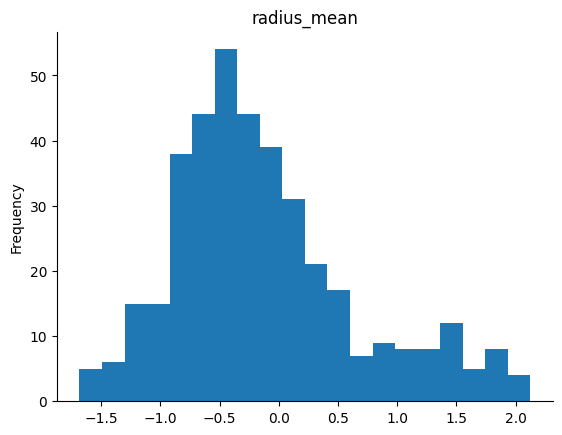

In [ ]:
# @title radius_mean

from matplotlib import pyplot as plt
data_no_outliers['radius_mean'].plot(kind='hist', bins=20, title='radius_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

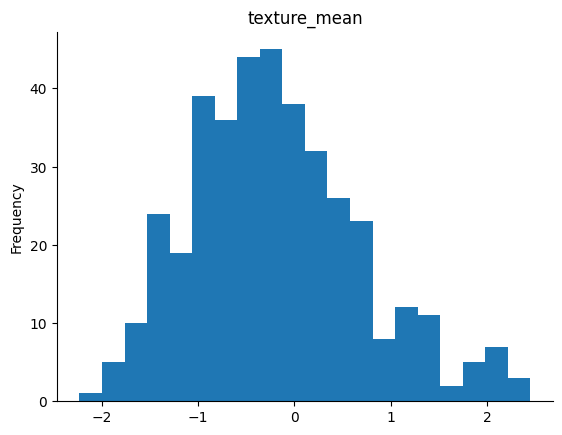

In [ ]:
# @title texture_mean

from matplotlib import pyplot as plt
data_no_outliers['texture_mean'].plot(kind='hist', bins=20, title='texture_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

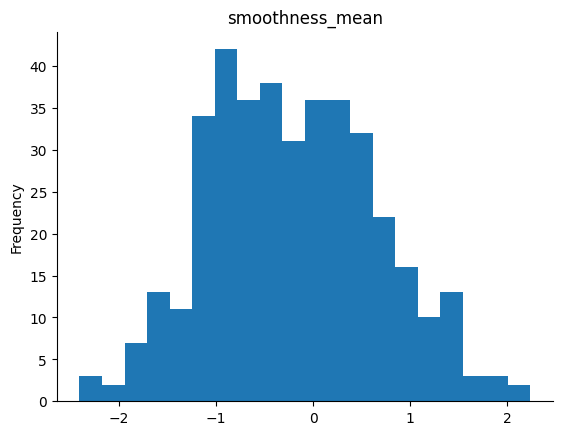

In [ ]:
# @title smoothness_mean

from matplotlib import pyplot as plt
data_no_outliers['smoothness_mean'].plot(kind='hist', bins=20, title='smoothness_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

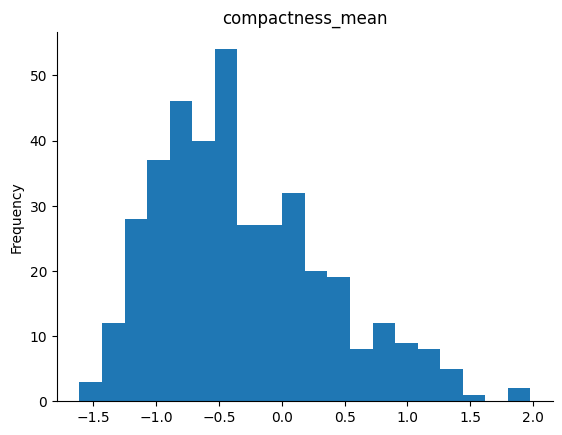

In [ ]:
# @title compactness_mean

from matplotlib import pyplot as plt
data_no_outliers['compactness_mean'].plot(kind='hist', bins=20, title='compactness_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

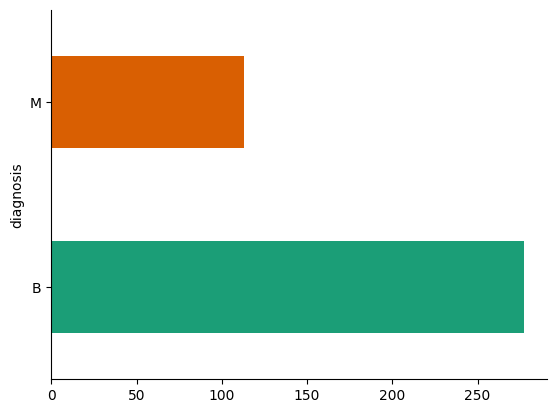

In [ ]:
# @title diagnosis

from matplotlib import pyplot as plt
import seaborn as sns
data_no_outliers.groupby('diagnosis').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

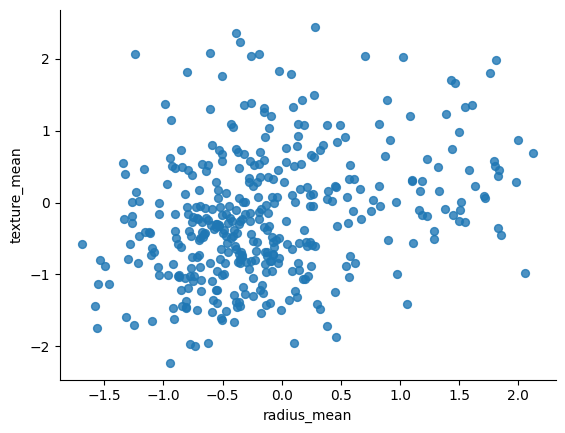

In [ ]:
# @title radius_mean vs texture_mean

from matplotlib import pyplot as plt
data_no_outliers.plot(kind='scatter', x='radius_mean', y='texture_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

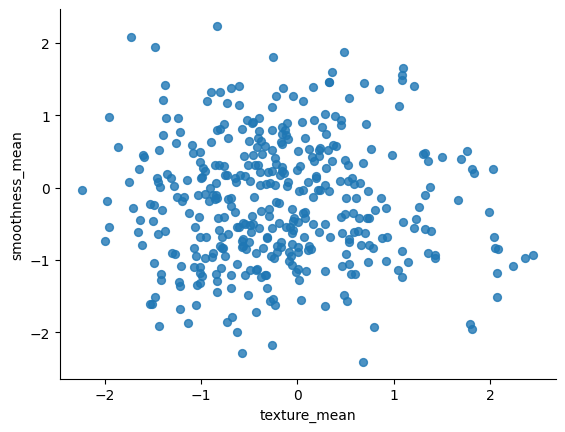

In [ ]:
# @title texture_mean vs smoothness_mean

from matplotlib import pyplot as plt
data_no_outliers.plot(kind='scatter', x='texture_mean', y='smoothness_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

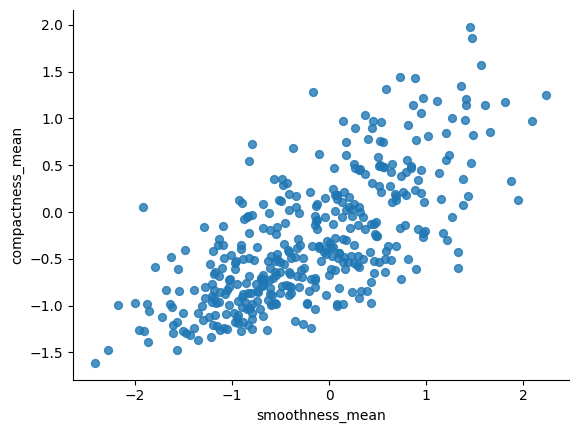

In [ ]:
# @title smoothness_mean vs compactness_mean

from matplotlib import pyplot as plt
data_no_outliers.plot(kind='scatter', x='smoothness_mean', y='compactness_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

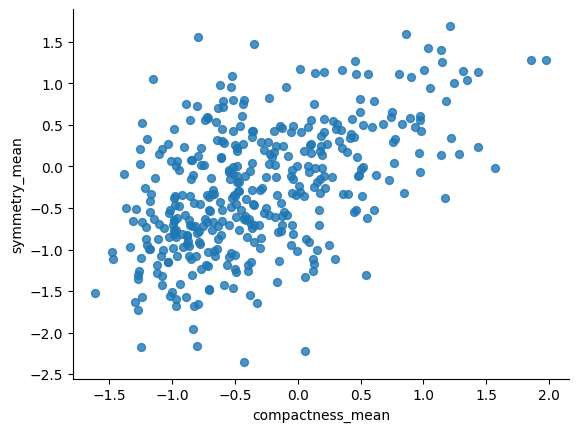

In [ ]:
# @title compactness_mean vs symmetry_mean

from matplotlib import pyplot as plt
data_no_outliers.plot(kind='scatter', x='compactness_mean', y='symmetry_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 1 to 566
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             390 non-null    float64
 1   texture_mean            390 non-null    float64
 2   smoothness_mean         390 non-null    float64
 3   compactness_mean        390 non-null    float64
 4   symmetry_mean           390 non-null    float64
 5   fractal_dimension_mean  390 non-null    float64
 6   radius_se               390 non-null    float64
 7   texture_se              390 non-null    float64
 8   smoothness_se           390 non-null    float64
 9   compactness_se          390 non-null    float64
 10  concave points_se       390 non-null    float64
 11  symmetry_se             390 non-null    float64
 12  symmetry_worst          390 non-null    float64
 13  diagnosis               390 non-null    object 
dtypes: float64(13), object(1)
memory usage: 45.7+ K

{'whiskers': [<matplotlib.lines.Line2D at 0x7997a6918ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7997a6918760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7997a691bf10>,
 'medians': [<matplotlib.lines.Line2D at 0x7997a6918220>,
 'fliers': [<matplotlib.lines.Line2D at 0x7997a691b490>,
 'means': []}

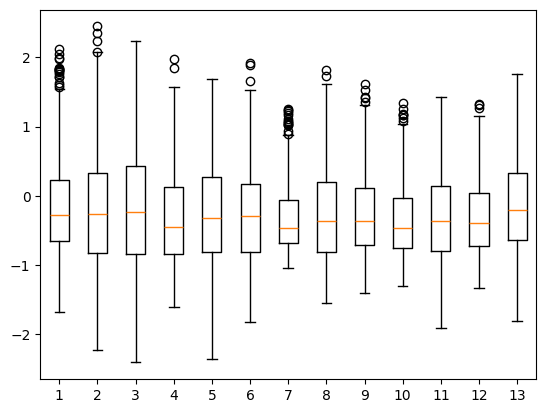

In [ ]:
plt.boxplot(data_no_outliers.select_dtypes(include=np.number))

In [ ]:
x = data_no_outliers.drop('diagnosis',axis=1)
y = data_no_outliers['diagnosis']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**model building**

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_1 = svm_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_1)
print(f"Accuracy of SVM model: {accuracy*100}")

Accuracy of SVM model: 97.43589743589743


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        49
           M       1.00      0.93      0.96        29

    accuracy                           0.97        78
   macro avg       0.98      0.97      0.97        78
weighted avg       0.98      0.97      0.97        78



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(x_train, y_train)


LogisticRegression(random_state=42)

In [ ]:

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(x_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of Logistic Regression model: {accuracy_logreg * 100}")

Accuracy of Logistic Regression model: 97.43589743589743


In [ ]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        49
           M       1.00      0.93      0.96        29

    accuracy                           0.97        78
   macro avg       0.98      0.97      0.97        78
weighted avg       0.98      0.97      0.97        78



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluate the Decision Tree model
y_pred_dt = dt_classifier.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree model: {accuracy_dt*100}")

Accuracy of Decision Tree model: 85.8974358974359


In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           B       0.87      0.92      0.89        49
           M       0.85      0.76      0.80        29

    accuracy                           0.86        78
   macro avg       0.86      0.84      0.85        78
weighted avg       0.86      0.86      0.86        78



In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(x_train, y_train)



KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred_knn = knn_classifier.predict(x_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN model: {accuracy_knn * 100}")
print(classification_report(y_test, y_pred_knn))

Accuracy of KNN model: 92.3076923076923
              precision    recall  f1-score   support

           B       0.91      0.98      0.94        49
           M       0.96      0.83      0.89        29

    accuracy                           0.92        78
   macro avg       0.93      0.90      0.92        78
weighted avg       0.93      0.92      0.92        78



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the test set
y_pred_nb = nb_classifier.predict(x_test)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Naive Bayes model: {accuracy_nb * 100}")
print(classification_report(y_test, y_pred_nb))

Accuracy of Naive Bayes model: 88.46153846153845
              precision    recall  f1-score   support

           B       0.86      0.98      0.91        49
           M       0.95      0.72      0.82        29

    accuracy                           0.88        78
   macro avg       0.91      0.85      0.87        78
weighted avg       0.89      0.88      0.88        78



In [ ]:
def predict_cancer(input_features):
    # Reshape the input to be a 2D array as expected by the model
    input_features_reshaped = np.array(input_features).reshape(1, -1)

    # Standardize the input features using the same scaler used for training data
    input_features_scaled = scaler.transform(input_features_reshaped)

    # Use the trained Logistic Regression model to predict
    prediction = logreg_classifier.predict(input_features_scaled)[0]

    if prediction == 'M':
        return "Malignant (cancerous)"
    elif prediction == 'B':
        return "Benign (non-cancerous)"
    else:
        return "Invalid prediction"



In [ ]:
user_input_features = []
for col in x.columns:  # Iterate through the features of your model
  val = float(input(f"Enter value for {col}: "))
  user_input_features.append(val)

prediction_result = predict_cancer(user_input_features)
print(f"Prediction: {prediction_result}")

Enter value for radius_mean: 13.54
Enter value for texture_mean: 14.36
Enter value for smoothness_mean: 0.09779
Enter value for compactness_mean: 0.08129
Enter value for symmetry_mean: 0.1885
Enter value for fractal_dimension_mean: 0.05766
Enter value for radius_se: 0.2699
Enter value for texture_se: 0.7886
Enter value for smoothness_se: 0.008462
Enter value for compactness_se: 0.0146
Enter value for concave points_se: 0.01315
Enter value for symmetry_se: 0.0198
Enter value for symmetry_worst: 0.2977
Prediction: Benign (non-cancerous)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

# Save the model
filename = 'finalized_model.pkl'
pickle.dump(logreg_classifier, open(filename, 'wb'))

# Save the scaler
scaler_filename = 'scaler.pkl'
pickle.dump(scaler, open(scaler_filename, 'wb'))

